# APPLYING THE DECISION TREE ALGORITHM ON A COMPANY DATASET

In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 

In [5]:
company=pd.read_csv("C:\\Users\\MOHD SHOEB\\OneDrive\\Desktop\\Excelr Assignments\\Decision Trees\\Company_Data.csv")

In [6]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [7]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
company.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [9]:
company.loc[company['Sales']<=7.49,'Sales']=0 #here '0' indicates sales were low
company[company['Sales']<=7.49]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
3,0.0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0.0,141,64,3,340,128,Bad,38,13,Yes,No
6,0.0,115,105,0,45,108,Medium,71,15,Yes,No
8,0.0,132,110,0,108,124,Medium,76,10,No,No
9,0.0,132,113,0,131,124,Medium,76,17,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
393,0.0,109,51,10,26,120,Medium,30,17,No,Yes
394,0.0,130,58,19,366,139,Bad,33,16,Yes,Yes
396,0.0,139,23,3,37,120,Medium,55,11,No,Yes
397,0.0,162,26,12,368,159,Medium,40,18,Yes,Yes


In [10]:
company.loc[company['Sales']>7.49,'Sales']=1
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1.0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1.0,111,48,16,260,83,Good,65,10,Yes,Yes
2,1.0,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0.0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0.0,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,138,108,17,203,128,Good,33,14,Yes,Yes
396,0.0,139,23,3,37,120,Medium,55,11,No,Yes
397,0.0,162,26,12,368,159,Medium,40,18,Yes,Yes
398,0.0,100,79,7,284,95,Bad,50,12,Yes,Yes


In [11]:
company.CompPrice.unique()

array([138, 111, 113, 117, 141, 124, 115, 136, 132, 121, 122, 107, 149,
       118, 147, 110, 129, 125, 134, 128, 145, 139,  98, 103, 104, 114,
       131, 109, 130, 119, 157,  77, 123,  85, 127, 126, 116,  99, 153,
       143, 133,  93, 105, 100,  89, 148, 150,  88, 102, 151,  97, 161,
       135, 112,  94, 108,  96, 146, 140, 144, 142, 106, 137, 120, 156,
       155, 162,  86, 159,  95, 175, 154, 152], dtype=int64)

In [12]:
le=LabelEncoder()

In [13]:
#company.CompPrice=le.fit_transform(company.CompPrice)
#company.CompPrice

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CompPrice', ylabel='Density'>

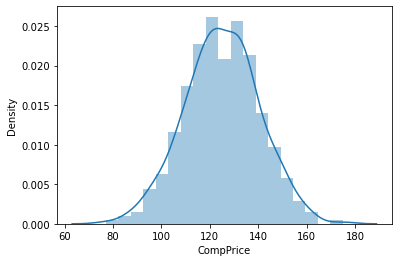

In [14]:
sns.distplot(company.CompPrice)

In [15]:
company.Income.unique()

array([ 73,  48,  35, 100,  64, 113, 105,  81, 110,  78,  94,  28, 117,
        95,  32,  74,  76,  90,  29,  46,  31, 119, 115, 118,  99,  58,
        38,  54,  84,  41,  60,  98,  53,  69,  42,  79,  63,  52,  93,
        40, 103,  82,  91,  71, 102,  45,  88,  67,  26,  92,  61,  59,
        51,  68, 111,  87,  72,  83,  36,  25,  66,  22,  30,  97,  77,
        47,  96,  33, 107,  65,  62,  75,  89, 120,  34,  21,  39, 106,
        24, 112,  37,  70,  80,  44, 104,  43,  56, 114,  57,  86,  50,
        27, 101, 109,  55, 116, 108,  23], dtype=int64)

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

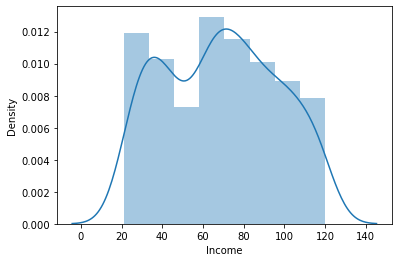

In [16]:
sns.distplot(company.Income)

In [17]:
company.Advertising.unique()

array([11, 16, 10,  4,  3, 13,  0, 15,  9,  2,  5, 12,  6, 14, 18, 19, 20,
       23,  1,  7, 24,  8, 17, 25, 26, 29, 22, 21], dtype=int64)

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Advertising', ylabel='Density'>

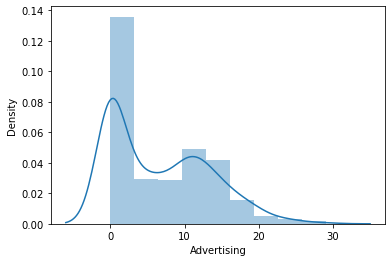

In [18]:
sns.distplot(company.Advertising)

In [19]:
company.Population.unique()

array([276, 260, 269, 466, 340, 501,  45, 425, 108, 131, 150, 503, 393,
        29, 148, 400, 284, 251, 408,  58, 367, 239, 497, 292, 294, 176,
       496,  19, 359, 226, 447, 241, 236, 317, 406, 270, 412, 454, 144,
        18, 403,  25,  16, 325, 168, 173, 349,  51, 341, 112,  39,  60,
        54,  22, 188, 469, 358, 146, 170, 184, 197, 508, 152, 366, 339,
       237, 432, 125, 480, 346,  44, 139, 286, 353, 468,  52, 304, 272,
       493, 491, 267,  97,  67, 134, 407, 287, 382, 220,  94,  89,  57,
       334, 472, 398, 217, 104, 488, 298, 335,  17,  95, 202, 507, 243,
       137, 249, 380, 181, 192, 350, 279, 208, 232, 265, 327, 384,  10,
       436, 371, 310, 277, 331, 300,  36, 264,  27, 402, 140, 289,  59,
       189, 372, 486,  81, 424,  40, 100, 151, 216, 492, 356, 416, 123,
       207,  38,  70, 434,  79, 230, 426,  35, 449,  93, 142, 509, 297,
        71, 481, 420, 410, 333, 500, 413, 132, 326, 357, 445,  48, 156,
       262, 178, 464, 245,  68, 381, 404, 119,  24, 218, 361, 49

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Population', ylabel='Density'>

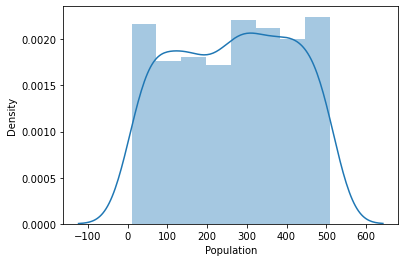

In [20]:
sns.distplot(company.Population)

In [21]:
company.Price.unique()

array([120,  83,  80,  97, 128,  72, 108, 124, 100,  94, 136,  86, 118,
       144, 110, 131,  68, 121, 109, 138, 113,  82, 107, 102,  89, 137,
        96, 126,  24, 134,  95, 135,  70,  98, 149, 129, 119, 154,  84,
       117, 103, 114, 123, 133, 101, 104,  91, 115,  99, 150, 116,  92,
       145,  90,  79, 139, 112, 111, 125, 148, 132, 127, 106, 151,  87,
       155,  49, 147,  77, 159,  69, 157, 160, 141, 191,  93,  55, 185,
       122,  81, 140, 173, 146, 130,  64, 105, 163,  88, 156, 166,  63,
       158,  74,  54, 171, 152, 143, 164, 162,  53,  78], dtype=int64)

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

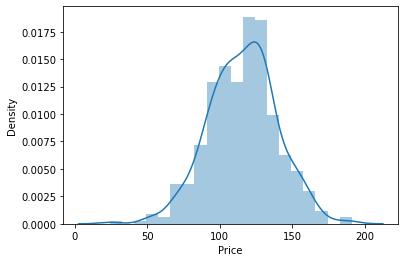

In [22]:
sns.distplot(company.Price)

In [23]:
company.ShelveLoc.unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [24]:
company.ShelveLoc=le.fit_transform(company.ShelveLoc)

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ShelveLoc', ylabel='Density'>

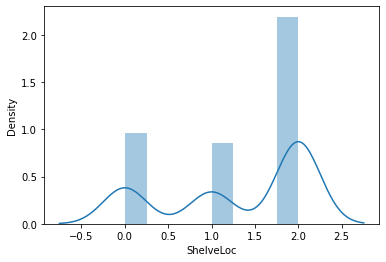

In [25]:
sns.distplot(company.ShelveLoc)

In [26]:
company.Age.unique()

array([42, 65, 59, 55, 38, 78, 71, 67, 76, 26, 50, 62, 53, 52, 63, 46, 69,
       35, 79, 54, 64, 58, 30, 44, 60, 73, 48, 32, 80, 75, 39, 61, 74, 29,
       77, 56, 47, 25, 31, 36, 41, 68, 70, 28, 43, 49, 45, 33, 34, 51, 40,
       72, 57, 27, 66, 37], dtype=int64)

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

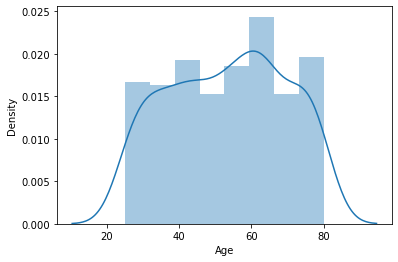

In [27]:

sns.distplot(company.Age)

In [28]:
company.Education.unique()

array([17, 10, 12, 14, 13, 16, 15, 18, 11], dtype=int64)

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Education', ylabel='Density'>

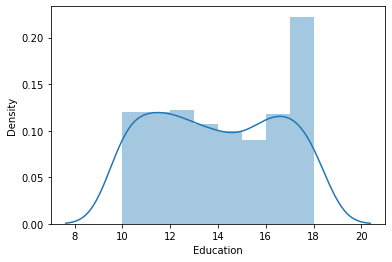

In [29]:

sns.distplot(company.Education)

In [30]:
company.Urban.unique()

array(['Yes', 'No'], dtype=object)

In [31]:
company.Urban=le.fit_transform(company.Urban)

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Urban', ylabel='Density'>

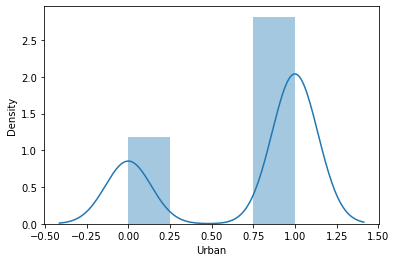

In [32]:
sns.distplot(company.Urban)

In [33]:
company.US.unique()

array(['Yes', 'No'], dtype=object)

In [34]:
company.US=le.fit_transform(company.US)

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='US', ylabel='Density'>

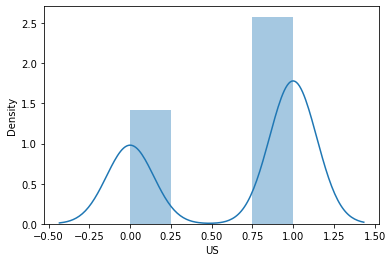

In [35]:
sns.distplot(company.US)

In [36]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1.0,138,73,11,276,120,0,42,17,1,1
1,1.0,111,48,16,260,83,1,65,10,1,1
2,1.0,113,35,10,269,80,2,59,12,1,1
3,0.0,117,100,4,466,97,2,55,14,1,1
4,0.0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,138,108,17,203,128,1,33,14,1,1
396,0.0,139,23,3,37,120,2,55,11,0,1
397,0.0,162,26,12,368,159,2,40,18,1,1
398,0.0,100,79,7,284,95,0,50,12,1,1


In [37]:
X=company.iloc[:,1:]
Y=company.iloc[:,:1]


In [38]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=20)

In [39]:
model_C5=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model_C5.fit(x_train,y_train)

                                     
                                     
    █▀▀▀▀▀█ █  ▄▄ ▀▀▄ █▄  █▀▀▀▀▀█    
    █ ███ █ ██▄ █▄▀▄▄▀▀▄  █ ███ █    
    █ ▀▀▀ █ ▄██ ▀▀ ▀▀█▀▄▄ █ ▀▀▀ █    
    ▀▀▀▀▀▀▀ ▀ █▄▀ █ ▀▄▀▄▀ ▀▀▀▀▀▀▀    
    ▀█  ██▀ ▄ ▀ ▀▄▀█▄▀▄▀ ▄▄█▄████    
    █▀▀▀ █▀▀▀█▀ ▄ ▀█▄▄▄▄█▄█ █▄ ▄█    
    ▄▄ █ █▀█  ▄▀▄▄▀█▄█▄ ▀▀▄▄▄▄▄█▄    
    ▀█▄▀ ▀▀█▄█▀█▀▀▄▀▀▄█  ▀▄▀█▀▀▄█    
    ▄  ▄ █▀▄  ▀ ▀ ▀█▄█▄▀ ▀▄▄▄▄ █▄    
      ▀█▀█▀▀▀ █ ▄  █▄██ ▀▄▀▀▄ ▀▄█    
    ▀▀  ▀ ▀▀▄▄▄▀▄ ▀█▄████▀▀▀█▀  █    
    █▀▀▀▀▀█ ▄▀██▀  █▄▄███ ▀ █▀▀ ▀    
    █ ███ █ ▀█▄ ▀▄▀▄▄▀ █▀█▀▀▀▀  █    
    █ ▀▀▀ █ ▄█  ▄ ▀▀██▀▀█▄   █▀██    
    ▀▀▀▀▀▀▀ ▀  ▀▀▀▀ ▀▀ ▀▀▀ ▀ ▀ ▀     
                                     
                                     
https://mlnotify.aporia.com/training/743884

Scan the QR code or enter the url to get a notification when your training is done




DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [40]:
company.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

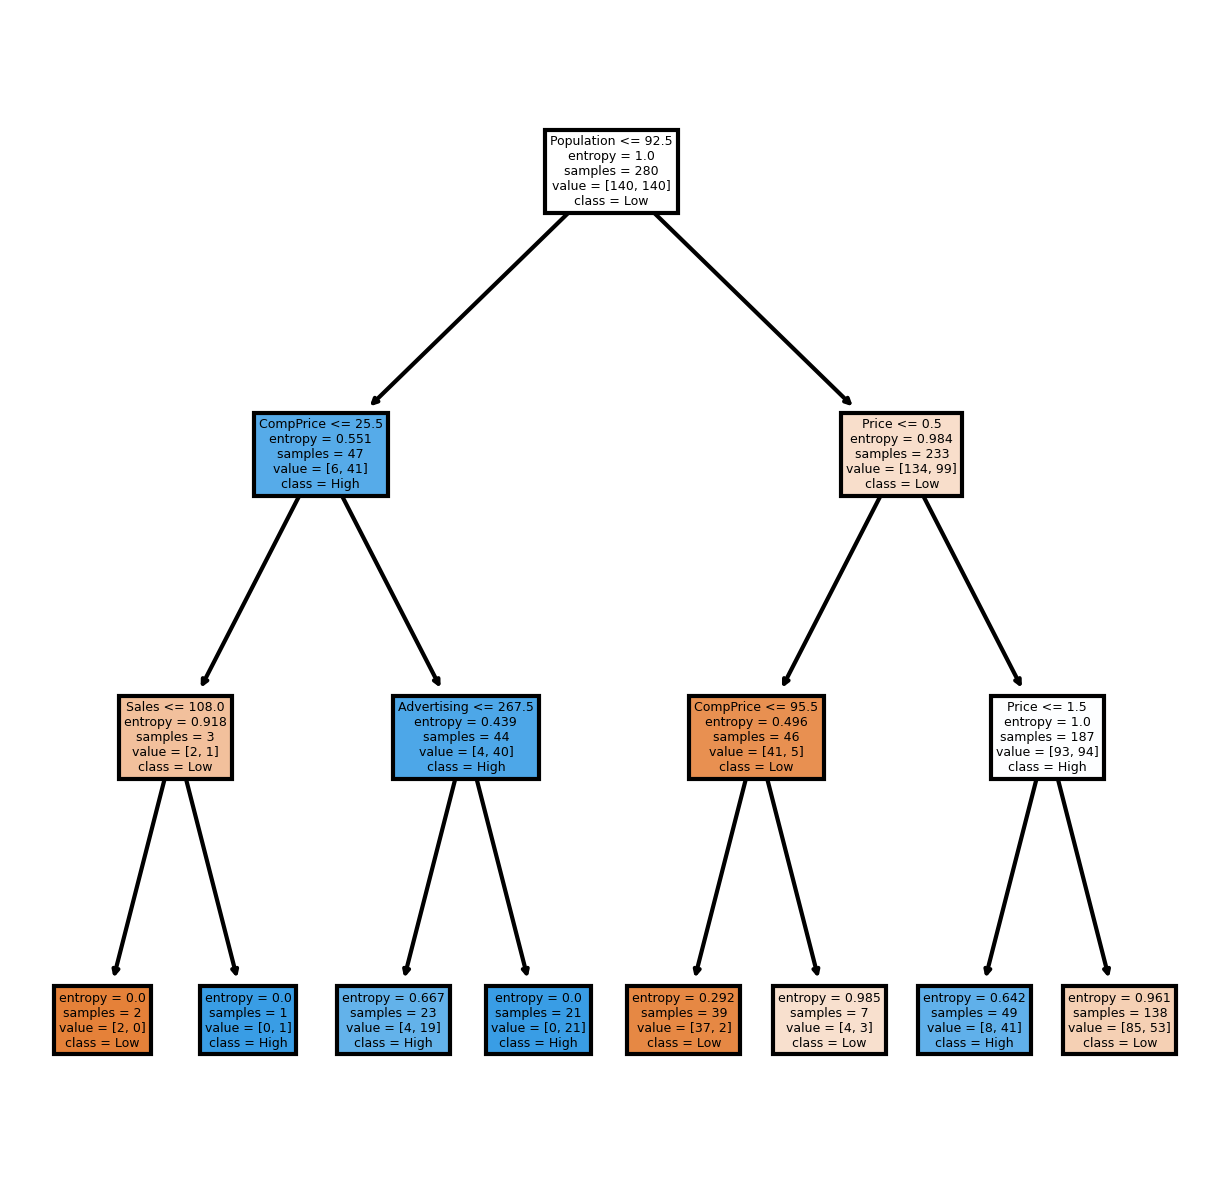

In [41]:
fn=['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low','High']
fig,axes=plt.subplots(nrows=1,ncols=1,dpi=300,figsize=(5,5))
tree.plot_tree(model_C5,feature_names=fn,class_names=cn,filled=True);

In [42]:
y_pred_C5=model_C5.predict(x_test)
print(classification_report(y_test,y_pred_C5))

              precision    recall  f1-score   support

         0.0       0.64      0.89      0.74        61
         1.0       0.80      0.47      0.60        59

    accuracy                           0.68       120
   macro avg       0.72      0.68      0.67       120
weighted avg       0.72      0.68      0.67       120



In [43]:
accuracy_score(y_test,y_pred_C5)

0.6833333333333333

In [44]:
import mlnotify
model_CART=DecisionTreeClassifier(criterion='gini',max_depth=4)
model_CART.fit(x_train,y_train)

                                     
                                     
    █▀▀▀▀▀█ ▀▀▀█▄ ▀ █▀█▄  █▀▀▀▀▀█    
    █ ███ █  ▀▄█ ██ ▄▄▄█▄ █ ███ █    
    █ ▀▀▀ █  ▄▀█▀▄▄ █ ▀▀  █ ▀▀▀ █    
    ▀▀▀▀▀▀▀ █▄▀ █▄▀▄█ █ █ ▀▀▀▀▀▀▀    
    █▀ ██▄▀▄▄▀▄ ▀  ▄▀▀▄█▀▄▀▄▄ ▄▄▀    
     ▀▀█▀█▀█▄▀  ▀▀ ▀█▄▀▄▄ ▄  ▄▀ ▄    
    ██▄▄▀▄▀▀▄██ ▄ ▀▄█▄▄ ▀ ██▄▄▄▄█    
      ▄▄▄▀▀ ▀▄  ▄▀▄█▀▀ ▀▄█▄▄  █ █    
    ▄▀ ▀▀▄▀▀▀▀ █▀██▄  ▄▄▄  ▀▄▀▄▄     
    ██▀█  ▀██ ▄▄▀█▀▀ ▀ █▄ ██▀█▄ ▀    
    ▀▀  ▀ ▀ █▀▄▀▄▄ ▄▀██▀█▀▀▀██▀▀     
    █▀▀▀▀▀█  ▀██▄ █▀█▄ ██ ▀ █▀ ▄     
    █ ███ █ ███▀▀▄▀██  █▀█▀▀▀▀ ▀▄    
    █ ▀▀▀ █ ▄▄██▀ ███ ▄ ▀  ██▄█▀█    
    ▀▀▀▀▀▀▀ ▀ ▀ ▀ ▀▀▀   ▀            
                                     
                                     
https://mlnotify.aporia.com/training/768996

Scan the QR code or enter the url to get a notification when your training is done




DecisionTreeClassifier(max_depth=4)

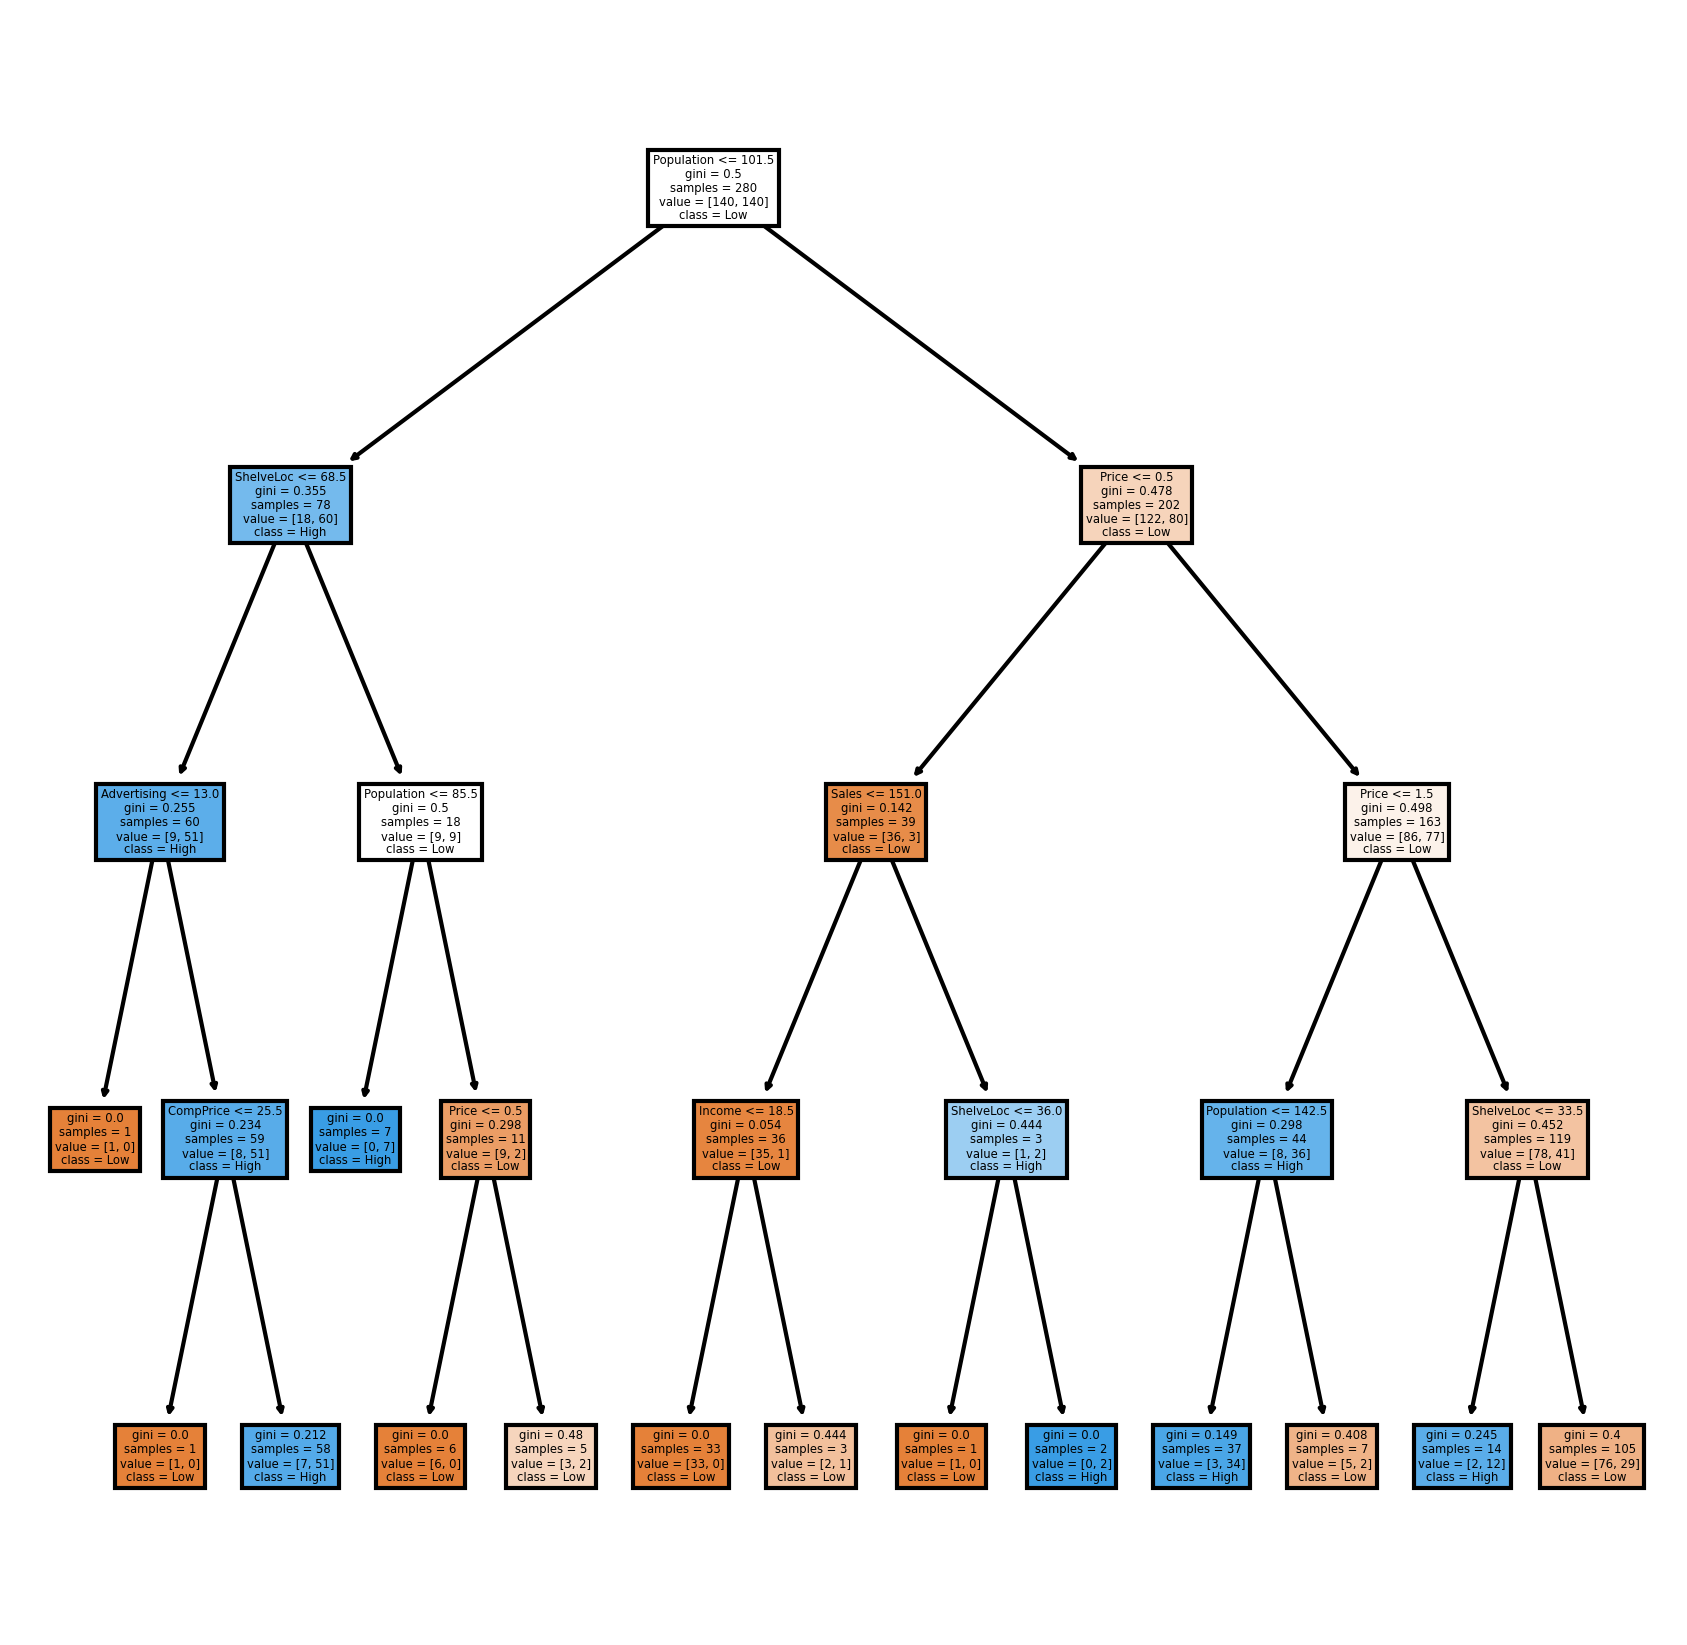

In [45]:
fig,axes=plt.subplots(nrows=1,ncols=1,dpi=300,figsize=(7,7))
tree.plot_tree(model_CART,feature_names=fn,class_names=cn,filled=True);

In [46]:
y_pred_CART=model_CART.predict(x_test)
print(classification_report(y_test,y_pred_CART))

              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74        61
         1.0       0.75      0.64      0.69        59

    accuracy                           0.72       120
   macro avg       0.72      0.72      0.71       120
weighted avg       0.72      0.72      0.72       120



In [47]:
accuracy_score(y_test,y_pred_CART)

0.7166666666666667